Load necessary libraries.

In [65]:
### Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os

### ML packages
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering #Hierarchial Clustering
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import defaultdict
import umap
from sklearn.metrics import silhouette_samples

### Msc
import warnings

### OOP
from ml_utils import SilhouetteEvaluator, ClusterEvaluator, make_gmm, make_hierarchical, make_spectral

Load dataset.

In [66]:
df = pd.read_csv('00_authors.csv').rename(columns = {'Unnamed: 0': 'Author'}).drop(columns = 'BookID')
X = df.copy().drop(['Author'], axis=1)
X = X.to_numpy() # change pd.DataFrame to np.ndarray
authors = df['Author'].values  # n_samples-length array

UMAP Dimensional Reduction!

In [67]:
warnings.filterwarnings("ignore", category=UserWarning, module="umap") # Suppress the specific UMAP warning on parralelism
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.3)
X_umap = umap_model.fit_transform(X)

# Silhouette Score

The method with the highest silhouette score generalizes best!

## Kmeans++

Kmeans++ with and without UMAP:

Kmeans++ without dimension reduction:
The scores across K = {2: 0.26355898207400613, 3: 0.20839530722882707, 4: 0.1904947560045998, 5: 0.19164906204141008, 6: 0.16858722759361308, 7: 0.15782653620074277, 8: 0.15629177190193141, 9: 0.13767149538596918, 10: 0.1290624223726912}
Best K: 2
Kmeans++ with dimension reduction (UMAP):
The scores across K = {2: 0.6374155, 3: 0.7061615, 4: 0.7108343, 5: 0.61172205, 6: 0.55258596, 7: 0.55412227, 8: 0.49916664, 9: 0.50050485, 10: 0.4581586}
Best K: 4


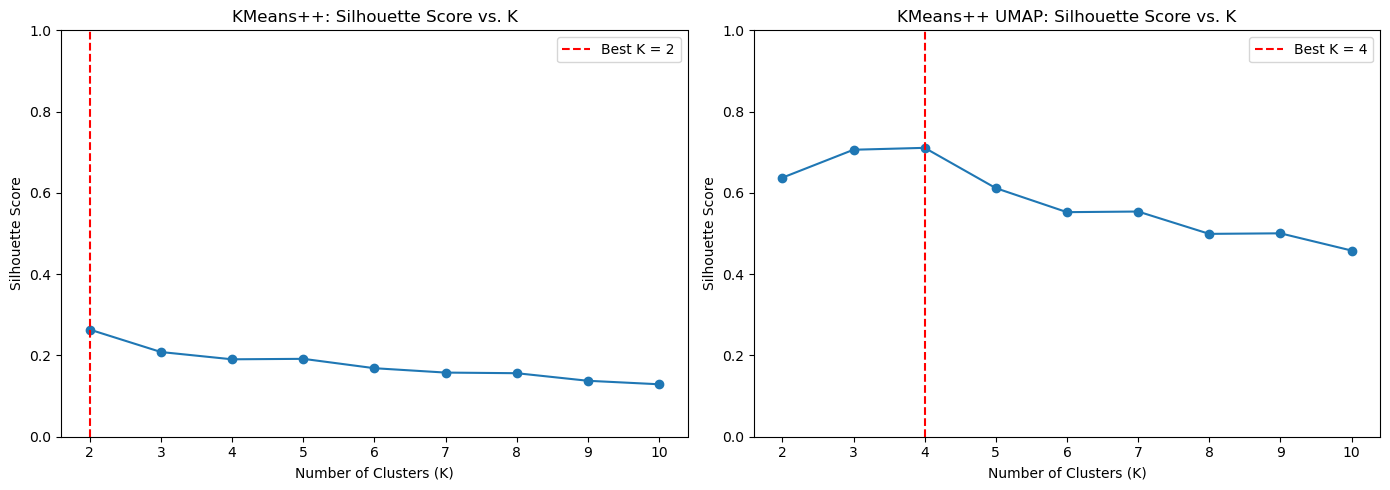

In [68]:
# Kmeans++ 
print('\033[1m' + 'Kmeans++ without dimension reduction:' + '\033[0m')
evaluator_kmeans = SilhouetteEvaluator(X, KMeans, k_range=range(2, 11), init='k-means++', n_init=10, max_iter=300)
scores, best_k = evaluator_kmeans.evaluate()
print(f'The scores across K = {scores}')
print(f"Best K: {best_k}")

# Kmeans++ with UMAP
print('\033[1m' + 'Kmeans++ with dimension reduction (UMAP):' + '\033[0m')
evaluator_kmeans_umap = SilhouetteEvaluator(X_umap, KMeans, k_range=range(2, 11), init='k-means++', n_init=10, max_iter=300)
scores, best_k = evaluator_kmeans_umap.evaluate()
print(f'The scores across K = {scores}')
print(f"Best K: {best_k}")

y_min = 0
y_max = 1

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

evaluator_kmeans.plot("KMeans++", ax=axs[0])
axs[0].set_ylim(y_min, y_max)

evaluator_kmeans_umap.plot("KMeans++ UMAP", ax=axs[1])
axs[1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.savefig('Media/05_kmeans_silhouette_score')
plt.show()


## Gaussian Mixture Models

GMM without dimension reduction:
The scores across K = {2: 0.24476088625636777, 3: 0.20648025338069953, 4: 0.18897659560823626, 5: 0.18034973515421476, 6: 0.16655466296762012, 7: 0.1566155675851108, 8: 0.14997618174086946, 9: 0.15633672476963995, 10: 0.1295497224299195}
Best K: 2
GMM with dimension reduction (UMAP):
The scores across K = {2: 0.6374155, 3: 0.7061615, 4: 0.7108343, 5: 0.543904, 6: 0.5484278, 7: 0.5564666, 8: 0.52326417, 9: 0.51944554, 10: 0.4586098}
Best K: 4


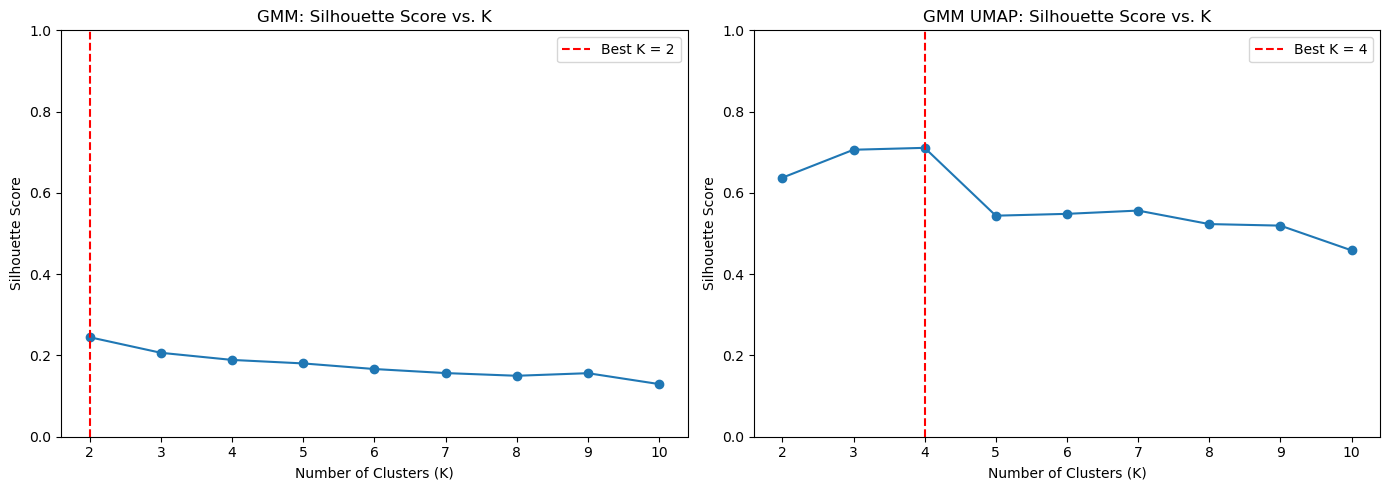

In [69]:
# GMM
print('\033[1m' + 'GMM without dimension reduction:' + '\033[0m')
evaluator_gmm = SilhouetteEvaluator(X, make_gmm(), k_range=range(2, 11))
scores, best_k = evaluator_gmm.evaluate()
print(f'The scores across K = {scores}')
print(f"Best K: {best_k}")

# GMM with UMAP
print('\033[1m' + 'GMM with dimension reduction (UMAP):' + '\033[0m')
evaluator_gmm_umap = SilhouetteEvaluator(X_umap, make_gmm(), k_range=range(2, 11))
scores, best_k = evaluator_gmm_umap.evaluate()
print(f'The scores across K = {scores}')
print(f"Best K: {best_k}")

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

evaluator_gmm.plot("GMM", ax=axs[0])
axs[0].set_ylim(y_min, y_max)

evaluator_gmm_umap.plot("GMM UMAP", ax=axs[1])
axs[1].set_ylim(y_min, y_max)

plt.tight_layout()

plt.savefig('Media/05_gmm_silhouette_score')
plt.show()

## Spectral Clustering

Spectral Clustering:
The scores across K = {2: 0.1408300984760483, 3: 0.20696881798137212, 4: 0.2020762541851448, 5: 0.1914837165759898, 6: 0.16570630789830376, 7: 0.15006558354299535, 8: 0.15779098304820008, 9: 0.13782196848729564, 10: 0.1336400256361507}
Best K: 3


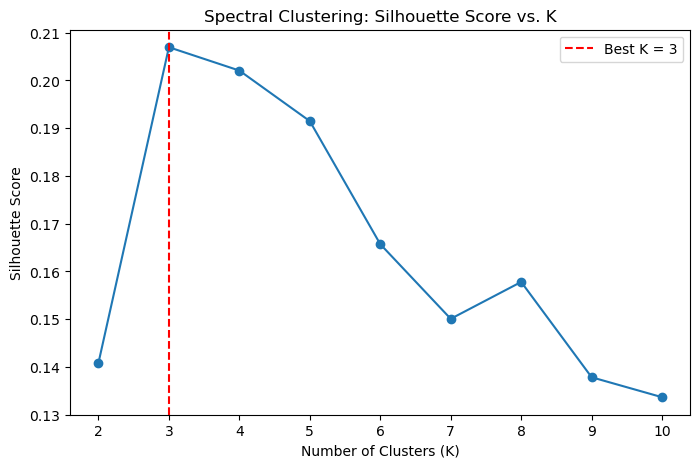

In [70]:
print('\033[1m' + 'Spectral Clustering:' + '\033[0m')
evaluator_spectral = SilhouetteEvaluator(X, make_spectral(affinity = 'nearest_neighbors'), k_range=range(2, 11))
scores, best_k = evaluator_spectral.evaluate()
print(f'The scores across K = {scores}')
print(f"Best K: {best_k}")

evaluator_spectral.plot('Spectral Clustering')
plt.savefig('Media/05_spectral_silhouette_score')

Although the silhouette score is commonly used to evaluate clustering performance, it assumes that clusters are spherical in shape, which does not align with the strengths of spectral clustering. Spectral clustering excels at uncovering non-linear and arbitrarily shaped cluster structures, which silhouette score is not well-equipped to quantify. Therefore, the low silhouette score observed here may understate the actual performance of spectral clustering. In fact, the spectral embedding reveals visually distinct and meaningful clusters (see notebook 02), suggesting that the method is effective despite the numerical metric.

## Hierarchial Clustering

Using the parameters 'ward' and 'euclidean' (because we have seen in notebook 04 that these have the highest accuracy)!

Hierarchical Clustering without dimension reduction:
The scores across K = {2: 0.23967574687100793, 3: 0.20437373269232859, 4: 0.18421197778513682, 5: 0.18654800991576861, 6: 0.16319550456880302, 7: 0.14995813568113975, 8: 0.1518500219855489, 9: 0.14745055233611987, 10: 0.1167264049290792}
Best K: 2
Hierarchical Clustering with dimension reduction (UMAP):
The scores across K = {2: 0.6374155, 3: 0.7061615, 4: 0.7108343, 5: 0.5960564, 6: 0.5275897, 7: 0.54090554, 8: 0.5471814, 9: 0.47988313, 10: 0.4314502}
Best K: 4


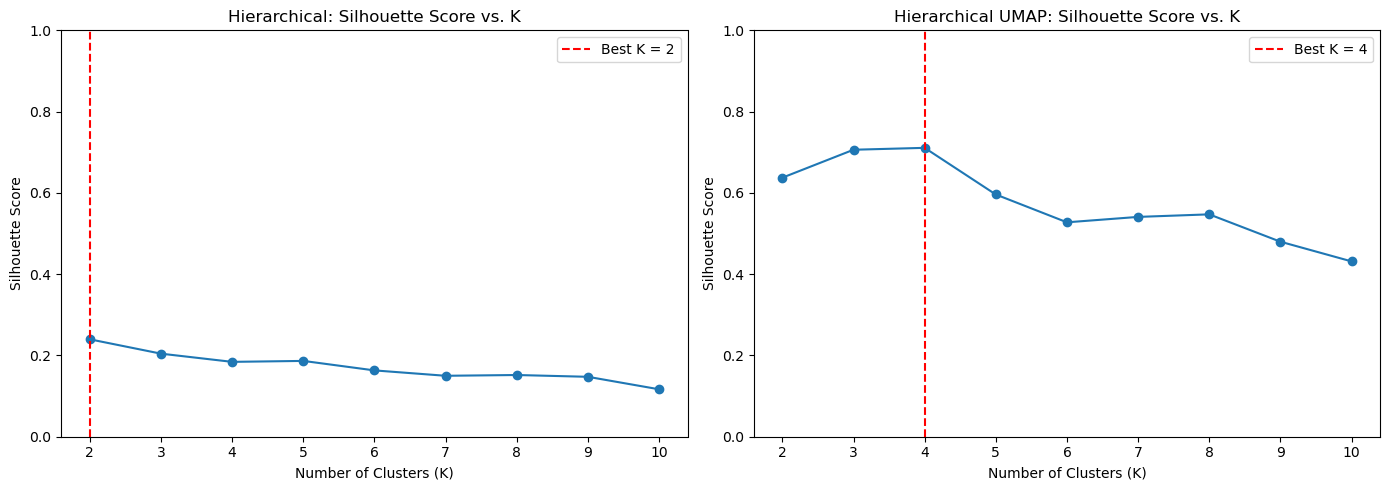

In [71]:
# Hierarchical Clustering
print('\033[1m' + 'Hierarchical Clustering without dimension reduction:' + '\033[0m')
evaluator_hier = SilhouetteEvaluator(X, make_hierarchical(linkage='ward', metric='euclidean'), k_range=range(2, 11))
scores, best_k = evaluator_hier.evaluate()
print(f'The scores across K = {scores}')
print(f"Best K: {best_k}")

# Hierarchical Clustering with UMAP
print('\033[1m' + 'Hierarchical Clustering with dimension reduction (UMAP):' + '\033[0m')
evaluator_hier_umap = SilhouetteEvaluator(X_umap, make_hierarchical(linkage='ward', metric='euclidean'), k_range=range(2, 11))
scores, best_k = evaluator_hier_umap.evaluate()
print(f'The scores across K = {scores}')
print(f"Best K: {best_k}")

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

evaluator_hier.plot("Hierarchical", ax=axs[0])
axs[0].set_ylim(y_min, y_max)

evaluator_hier_umap.plot("Hierarchical UMAP", ax=axs[1])
axs[1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.savefig('Media/05_hierarchical_silhouette_score')
plt.show()


# Comparison Viz

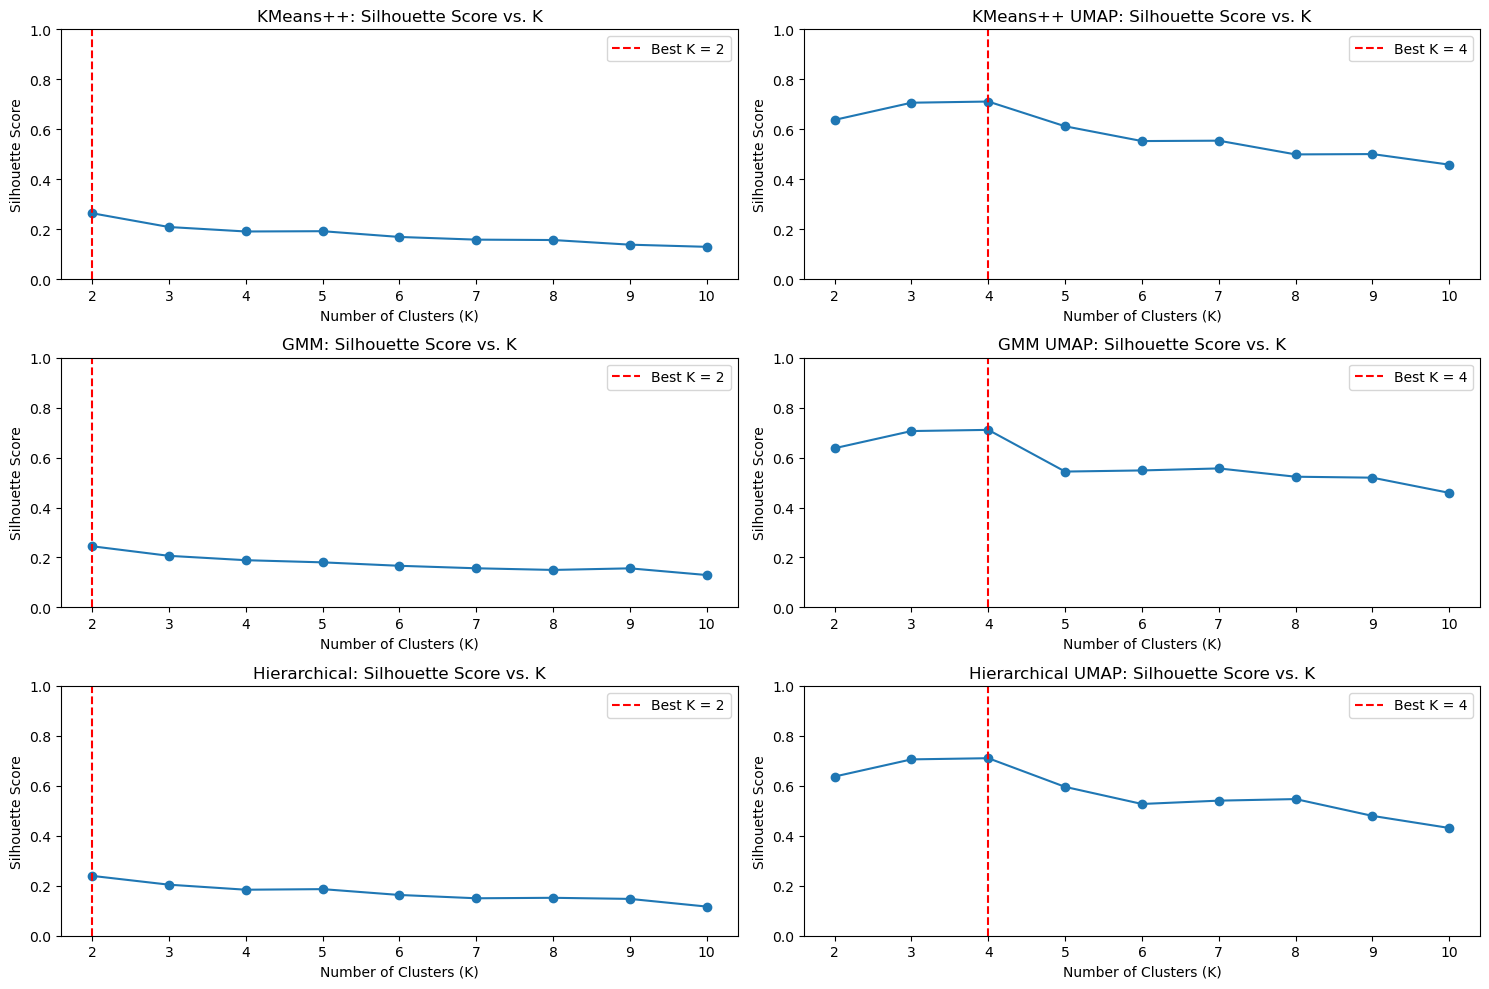

In [72]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

evaluator_kmeans.plot("KMeans++", ax=axs[0,0])
axs[0,0].set_ylim(y_min, y_max)
evaluator_kmeans_umap.plot("KMeans++ UMAP", ax=axs[0,1])
axs[0,1].set_ylim(y_min, y_max)

evaluator_gmm.plot("GMM", ax=axs[1,0])
axs[1,0].set_ylim(y_min, y_max)

evaluator_gmm_umap.plot("GMM UMAP", ax=axs[1,1])
axs[1,1].set_ylim(y_min, y_max)

evaluator_hier.plot("Hierarchical", ax=axs[2,0])
axs[2,0].set_ylim(y_min, y_max)

evaluator_hier_umap.plot("Hierarchical UMAP", ax=axs[2,1])
axs[2,1].set_ylim(y_min, y_max)

plt.savefig('Media/05_silhouette_score_across_methods')
plt.tight_layout()
